# Machine Learning - Supervised learning - Clasificación

![imagen](images/tit.jpeg)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Exploración-de-los-datos" data-toc-modified-id="Exploración-de-los-datos-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Exploración de los datos</a></span></li><li><span><a href="#Regresión-logística" data-toc-modified-id="Regresión-logística-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Regresión logística</a></span></li><li><span><a href="#Manos-a-la-obra" data-toc-modified-id="Manos-a-la-obra-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Manos a la obra</a></span><ul class="toc-item"><li><span><a href="#Vamos-a-entrenar-un-modelo" data-toc-modified-id="Vamos-a-entrenar-un-modelo-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Vamos a entrenar un modelo</a></span></li><li><span><a href="#Vamos-a-crear-una-columna-de-predicción-para-todo-el-dataframe" data-toc-modified-id="Vamos-a-crear-una-columna-de-predicción-para-todo-el-dataframe-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Vamos a crear una columna de predicción para todo el dataframe</a></span></li></ul></li><li><span><a href="#Métricas!" data-toc-modified-id="Métricas!-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Métricas!</a></span><ul class="toc-item"><li><span><a href="#Matriz-de-confusión" data-toc-modified-id="Matriz-de-confusión-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Matriz de confusión</a></span></li><li><span><a href="#Matriz-de-confusión-con-nuestros-datos" data-toc-modified-id="Matriz-de-confusión-con-nuestros-datos-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Matriz de confusión con nuestros datos</a></span></li><li><span><a href="#Accuracy" data-toc-modified-id="Accuracy-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Accuracy</a></span></li><li><span><a href="#Precision-(Precisión)" data-toc-modified-id="Precision-(Precisión)-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Precision (Precisión)</a></span></li><li><span><a href="#Recall-(Exhaustividad)" data-toc-modified-id="Recall-(Exhaustividad)-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Recall (Exhaustividad)</a></span></li><li><span><a href="#Diferenciando-precision-y-recall" data-toc-modified-id="Diferenciando-precision-y-recall-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Diferenciando precision y recall</a></span></li><li><span><a href="#F1-Score" data-toc-modified-id="F1-Score-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>F1 Score</a></span></li></ul></li><li><span><a href="#Repaso-de-Train-Test-Split-/-DIVISIÓN-EN-TRAIN-TEST" data-toc-modified-id="Repaso-de-Train-Test-Split-/-DIVISIÓN-EN-TRAIN-TEST-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Repaso de Train Test Split / DIVISIÓN EN TRAIN TEST</a></span></li><li><span><a href="#Entrenemos-el-modelo" data-toc-modified-id="Entrenemos-el-modelo-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Entrenemos el modelo</a></span></li><li><span><a href="#Hacemos-predicciones" data-toc-modified-id="Hacemos-predicciones-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Hacemos predicciones</a></span></li><li><span><a href="#Sacamos-todas-las-métricas" data-toc-modified-id="Sacamos-todas-las-métricas-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Sacamos todas las métricas</a></span></li><li><span><a href="#Resumen" data-toc-modified-id="Resumen-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Resumen</a></span></li></ul></div>

In [1]:
import pandas as pd
import seaborn as sns

 * Los modelos de regresión se utilizan cuando la variable objetivo es **cuantitativa**: 
  - salarios
  - emisiones de gases
  - edad de la persona en una foto
  - ...
 * Los modelos de clasificación se utilizan cuando la variable objetivo es cualitativa: 
  - sobrevivir (o no) al Titanic
  - devolver (o no) un préstamo
  - identificar un perro (o no) en una foto
  - decidir cuál de 3 especies de plantas es ésta
  - ...

## Exploración de los datos

In [7]:
df = pd.read_csv("data/breast_cancer.csv")

In [8]:
df.shape

(569, 31)

In [9]:
df.columns

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'mean_compactness', 'mean_concavity',
       'mean_concave_points', 'mean_symmetry', 'mean_fractal_dimension',
       'radius_error', 'texture_error', 'perimeter_error', 'area_error',
       'smoothness_error', 'compactness_error', 'concavity_error',
       'concave_points_error', 'symmetry_error', 'fractal_dimension_error',
       'worst_radius', 'worst_texture', 'worst_perimeter', 'worst_area',
       'worst_smoothness', 'worst_compactness', 'worst_concavity',
       'worst_concave_points', 'worst_symmetry', 'worst_fractal_dimension',
       'is_cancer'],
      dtype='object')

In [5]:
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,is_cancer
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


Documentation:  
a) radius (mean of distances from center to points on the perimeter)  
b) texture (standard deviation of gray-scale values)  
c) perimeter  
d) area  
e) smoothness (local variation in radius lengths)  
f) compactness (perimeter^2 / area - 1.0)  
g) concavity (severity of concave portions of the contour)  
h) concave points (number of concave portions of the contour)  
i) symmetry  
j) fractal dimension ("coastline approximation" - 1)  

La variable objetivo es `es_cáncer`.

Es una variable categórica, que toma los valores posibles $0$ y $1$º

<AxesSubplot:xlabel='is_cancer', ylabel='count'>

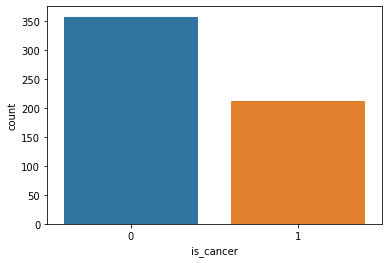

In [10]:
# Vamos a visualizar de forma rápida el balanceo de variables categóricas
sns.countplot(x=df.is_cancer)

## Regresión logística
La regresión logística es uno de los algoritmos más populares y utilizados para los problemas de clasificación. Como además es relativamente poco complejo y fácil de implementar, se suele utilizar como modelo de partida, aunque también puede producir resultados de muy alto rendimiento utilizado en producción. Aquí vamos a hablar de la Regresión Logística Binomial, que se utiliza para resultados binarios. La Regresión Logística Multinomial existe y puede utilizarse para problemas de clasificación multiclase, pero se utiliza con menos frecuencia. No la trataremos en esta lección. 

La regresión logística es en realidad una función de regresión lineal transformada. Podemos ver en la imagen de abajo que si intentáramos ajustar una regresión lineal a unos datos con un resultado binario, ajustaríamos una línea que no predice muy bien para ningún valor que no esté en los valores extremos: en el medio hay mucha zona en la que la línea está muy lejos de los puntos. Para acercar nuestra función a los datos, tenemos que transformar la función que estamos utilizando. En este caso, es útil utilizar una función sigmoidea, que estima una forma de "S". Ahora podemos ver que nuestra línea se ajusta a los datos mucho mejor. 

![regresiónlogística](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1534281070/linear_vs_logistic_regression_edxw03.png)

Refs:

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html     
https://techdifferences.com/difference-between-linear-and-logistic-regression.html    
https://stackoverflow.com/questions/12146914/what-is-the-difference-between-linear-regression-and-logistic-regression

## Manos a la obra

Intentemos predecir `es_cáncer` usando sólo como predictor `radio_medio`.

In [11]:
df = df[["mean_radius", "is_cancer"]]

In [13]:
df.sample(10).sort_values("mean_radius")

,mean_radius,is_cancer
467,9.668,0
103,9.876,0
426,10.480,0
332,11.220,0
397,12.800,0
199,14.450,1
448,14.530,0
343,19.680,1
260,20.310,1
272,21.750,1


### Vamos a entrenar un modelo

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
log = LogisticRegression()

In [17]:
X = df["mean_radius"].to_frame()
y = df["is_cancer"]

In [18]:
log.fit(X,y)

LogisticRegression()

In [ ]:
# Vamos a ver cómo funcionarcía con los primeroos 5 pacientes

In [ ]:
#Un modelo entrenado es una "máquina de predicción"

In [19]:
df_reducido = df[:5]

In [20]:
display(df_reducido)

,mean_radius,is_cancer
0,17.99,1
1,20.57,1
2,19.69,1
3,11.42,1
4,20.29,1


In [22]:
df_reducido["predicción"] = log.predict(df_reducido[["mean_radius"]])

<ipython-input-22-64346dbb9ce0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reducido["predicción"] = log.predict(df_reducido[["mean_radius"]])


In [23]:
df_reducido.head()

,mean_radius,is_cancer,predicción
0,17.99,1,1
1,20.57,1,1
2,19.69,1,1
3,11.42,1,0
4,20.29,1,1


### Vamos a crear una columna de predicción para todo el dataframe

In [25]:
df["prediction_cancer"] = log.predict(df[["mean_radius"]])

In [26]:
df

,mean_radius,is_cancer,prediction_cancer
0,17.99,1,1
1,20.57,1,1
2,19.69,1,1
3,11.42,1,0
4,20.29,1,1
...,...,...,...
564,21.56,1,1
565,20.13,1,1
566,16.60,1,1
567,20.60,1,1


## Métricas!

In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, confusion_matrix

### Matriz de confusión

Confusion Matrix (Matriz de Confusión)
Vamos a explicar como funciona la matriz de confusión con un ejemplo hipotético de marketing. En este ejemplo, contactamos a 100 clientes y 80 de ellos nos dicen que no están interesados y 20 de ellos que sí.

Nuestro modelo (en el ejemplo) no es muy bueno, aunque dependiendo de qué métrica usemos podría parecer que es mejor de lo que es.

Hemos utilizado como valores de la clasificación binaria:

- 0: no está interesado    
- 1: sí está interesado

![matrizdeconfusión](https://www.iartificial.net/wp-content/uploads/2019/11/Matriz-Confusion-Ejemplo.webp)

En la matriz de confusión de la izquierda podéis ver los valores para este ejemplo. En la matriz de confusión de la derecha, los nombres genéricos cuando usamos la nomenclatura inglesa: True Negative [TN], True Positive [TP], False Positive [FP], False Negative [FN].

Truco: para recordar fácilmente la matriz de confusión:

Positivo (Positive) o Negativo (Negative): se refiere a la predicción. Si el modelo predice 1 entonces será positivo, y se predice 0 será negativo.
Verdadero (True) o Falso (False): se refiere si la predicción es correcta o no.

<img src="https://github.com/andrewwlong/classification_metrics_sklearn/raw/541a0d065ffb8b3ff705161f6d16088d434b2ea7/img/conf_matrix.png">

### Matriz de confusión con nuestros datos

In [28]:
pd.crosstab(
df.is_cancer,
df.prediction_cancer)

prediction_cancer,0,1
is_cancer,,
0,333,24
1,45,167


Equivalente con sklearn

In [29]:
from sklearn.metrics import confusion_matrix

In [31]:
confusion_matrix(
df.is_cancer,
df.prediction_cancer)

array([[333,  24],
       [ 45, 167]])

### Accuracy

La exactitud (accuracy) mide el porcentaje de casos que el modelo ha acertado. Esta es una de las métricas más usadas y favoritas … que te recomiendo evitar! El problema con la exactitud es que nos puede llevar al engaño, es decir, puede hacer que un modelo malo parezca que es mucho mejor de lo que es.
Representa la proporción de muestras predichas correctamente
 * La métrica más común para la clasificación
 * Es útil cuando
  - el conjunto de datos tiene clases equilibradas (proporción similar de Verdadero y Falso)
  - hay simetría entre Verdadero y Falso (por ejemplo, predicción de "hombre" o "mujer")
 * **¡A menudo se utiliza mal!** ya que:
  - muchos problemas no son simétricos (por ejemplo, cáncer frente a no cáncer)

El accuracy (exactitud) se calcula con la siguiente fórmula:

$$accuracy = \frac{TP + TN}{TP + TN + FP + FN}$$


In [32]:
accuracy_score(
df.is_cancer,
df.prediction_cancer)

0.8787346221441125

Interpretando esta métrica, vemos que el modelo ha acertado el 87% de los diagnósticos, esto es, se equivocará el 13% de las veces que prediga.

### Precision (Precisión)

Con la métrica de precisión podemos medir la calidad del modelo de machine learning en tareas de clasificación. En el ejemplo, se refiere a que la precisión es la respuesta a la pregunta ¿qué porcentaje de los clientes que contactemos estarán interesados?

Para calcular la precisión usaremos la siguiente fórmula:

$$precision = \frac{TP}{TP + FP}$$    

Es la fracción de eventos positivos predichos que son realmente positivos como se muestra a continuación

<img src="https://www.iartificial.net/wp-content/uploads/2019/11/precision.webp">

Precisión = Porcentaje de predicciones POSITIVAS fueron correctas.    
¿Qué proporción de los Positivos predichos es realmente Positiva?         
Tenemos que mirar el número total de Positivos predichos (los Verdaderos Positivos más los Falsos Positivos, TP+FP), y ver cuántos de ellos son Verdaderos Positivos (TP).

In [33]:
precision_score(
df.is_cancer,
df.prediction_cancer)

0.8743455497382199

### Recall (Exhaustividad)

La métrica de exhaustividad nos va a informar sobre la cantidad que el modelo de machine learning es capaz de identificar. En el ejemplo, se refiere a que la exhaustividad (recall) es la respuesta a la pregunta ¿qué porcentaje de los clientes están interesados somos capaces de identificar?

Para calcular la exhaustividad (recall) usaremos la siguiente fórmula:

$$recall = \frac{TP}{TP + FN}$$


<img src="https://www.iartificial.net/wp-content/uploads/2019/11/recall-exhaustividad.webp">

Responde a una pregunta diferente: ¿qué proporción de positivos reales se clasifica correctamente?      
Porcentaje de casos positivos que he capturado.

In [34]:
recall_score(
df.is_cancer,
df.prediction_cancer)

0.7877358490566038

### Diferenciando precision y recall
A pesar de ser similares, poseen distinciones sutiles.

- Precision: ¿Cuántas veces lo que mi modelo dice es realmente cierto?
- Recall: ¿Cuántas veces mi modelo es capaz de identificar la verdad?     
Precision se centra en lo que modelo dice y luego lo compara con la realidad. Por otro lado, recall parte de la realidad, y después evalúa que tan bueno es el modelo para reconocerla.

### F1 Score

El valor F1 se utiliza para combinar las medidas de precision y recall en un sólo valor. Esto es práctico porque hace más fácil el poder comparar el rendimiento combinado de la precisión y la exhaustividad entre varias soluciones.

F1 se calcula haciendo la media armónica entre la precisión y la exhaustividad:

$$F1 = 2 \cdot \frac{precision \cdot recall}{precision + recall}$$

In [35]:
f1_score(df.is_cancer,df.prediction_cancer)

0.8287841191066998

He extraído documentación de las métricas de [este](https://www.iartificial.net/precision-recall-f1-accuracy-en-clasificacion/) artículo excepcionalmente explicado.
Pero aquí os dejo más:
- https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9
- https://blog.exsilio.com/all/accuracy-precision-recall-f1-score-interpretation-of-performance-measures/
- https://wiki.pathmind.com/accuracy-precision-recall-f1
- https://datasmarts.net/es/mas-alla-del-accuracy-precision-recall-y-f1/

## Repaso de Train Test Split / DIVISIÓN EN TRAIN TEST

In [ ]:
# Dibujo train test split

![divisióntraintest](images/traintest.png)

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [41]:
X_train.shape

(455, 1)

In [42]:
y_train.shape

(455,)

In [43]:
X_test.shape

(114, 1)

In [44]:
y_test.shape

(114,)

## Entrenemos el modelo

In [45]:
log = LogisticRegression()

In [46]:
log.fit(X_train,y_train)

LogisticRegression()

## Hacemos predicciones

In [47]:
y_pred = log.predict(X_test)

## Sacamos todas las métricas

In [49]:
print("Accuracy", round(accuracy_score(y_test, y_pred), 3))
print("Precission", round(precision_score(y_test, y_pred), 3))
print("Recall", round(recall_score(y_test, y_pred), 3))
print("F1_score", round(f1_score(y_test, y_pred), 3))

Accuracy 0.877
Precission 0.946
Recall 0.745
F1_score 0.833


## Resumen
PIPELINE de cosas que tenemos que hacer sería:
- Cargo los datos
- Exploro los datos
- Limpio los datos
- Divido los datos en train y test
- Entreno el modelo con la parte de train
- Hago una predicción con la parte de X_test
- Saco métricas comparando la y_pred con la y_test
- Fin
- Clasificación variables cualitativas
- Regresión son variables cuantitativas
- Hemos visto diferentes métricas de la clasificación.
- La matriz de confusión
- La verdad y la verdad